In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
data = sns.load_dataset('titanic')

numeric_features = ['pclass','age','sibsp', 'parch', 'fare']
categorical_features = ['sex']
all_features = numeric_features + categorical_features

target = ['survived']

X = data[all_features]
y = data[target]


In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=123)


In [24]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.2, random_state=123)

### Preprocesamiento

In [25]:
# Variables categoricas convertidas con onehot-encoding

from sklearn.preprocessing import OneHotEncoder

# The encoder is used to convert categorical variables into a format that machine learning algorithms can understand.
# It transforms categorical variables into numerical representations.
# For example, LabelEncoder assigns integer labels to different categories, and OneHotEncoder creates binary columns for each category.

encoder = OneHotEncoder(handle_unknown='ignore')
x_train_cat = pd.DataFrame(encoder.fit_transform(x_train[categorical_features]).toarray(), index=x_train.index, columns=encoder.categories_[0])
x_val_cat = pd.DataFrame(encoder.transform(x_val[categorical_features]).toarray(), index=x_val.index, columns=encoder.categories_[0])
x_test_cat = pd.DataFrame(encoder.transform(x_test[categorical_features]).toarray(), index=x_test.index, columns=encoder.categories_[0])

In [26]:

# Datos en blanco

x_train.isna().mean()

pclass    0.000000
age       0.203866
sibsp     0.000000
parch     0.000000
fare      0.000000
sex       0.000000
dtype: float64

In [27]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(strategy='mean')
imputer2 = KNNImputer()

# The imputer is used to handle missing values in your dataset.
# It estimates missing values based on the strategy you choose (e.g., mean, median, or most frequent).
# The fit_transform() method fits the imputer on your data and simultaneously
# transforms the dataset by replacing missing values with the estimated ones.

x_train_no_missing = pd.DataFrame(imputer2.fit_transform(x_train[numeric_features]), index = x_train.index, columns = numeric_features)
x_val_no_missing = pd.DataFrame(imputer2.transform(x_val[numeric_features]), index = x_val.index, columns = numeric_features)
x_test_no_missing = pd.DataFrame(imputer2.transform(x_test[numeric_features]), index = x_test.index, columns = numeric_features)

In [28]:
x_train.isna().mean()

pclass    0.000000
age       0.203866
sibsp     0.000000
parch     0.000000
fare      0.000000
sex       0.000000
dtype: float64

In [29]:
x_train_no_missing.isna().mean()

pclass    0.0
age       0.0
sibsp     0.0
parch     0.0
fare      0.0
dtype: float64

In [51]:
x_train_final = pd.concat([x_train_no_missing, x_train_cat], axis=1)
x_val_final = pd.concat([x_val_no_missing, x_val_cat], axis=1)
x_test_final = pd.concat([x_test_no_missing, x_test_cat], axis=1)

In [53]:
x_val_final

,pclass,age,sibsp,parch,fare,female,male
639,3.0,30.0,1.0,0.0,16.1000,0.0,1.0
611,3.0,38.0,0.0,0.0,7.0500,0.0,1.0
53,2.0,29.0,1.0,0.0,26.0000,1.0,0.0
334,1.0,37.8,1.0,0.0,133.6500,1.0,0.0
499,3.0,24.0,0.0,0.0,7.7958,0.0,1.0
...,...,...,...,...,...,...,...
608,2.0,22.0,1.0,2.0,41.5792,1.0,0.0
610,3.0,39.0,1.0,5.0,31.2750,1.0,0.0
836,3.0,21.0,0.0,0.0,8.6625,0.0,1.0
175,3.0,18.0,1.0,1.0,7.8542,0.0,1.0


In [54]:
# Escalamiento de datos
# The scaler is used to scale numeric features to a standard range.
# It standardizes or normalizes the numeric features, which can be important for algorithms that are sensitive to the scale of input features.
# Common scalers include StandardScaler for z-score normalization and MinMaxScaler for scaling features to a specified range.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_final_escalado = pd.DataFrame(scaler.fit_transform(x_train_final), index = x_train_final.index, columns = x_train_final.columns)
x_val_final_escalado = pd.DataFrame(scaler.transform(x_val_final), index = x_val_final.index, columns = x_val_final.columns)
x_test_final_escalado = pd.DataFrame(scaler.transform(x_test_final), index = x_test_final.index, columns = x_test_final.columns)

x_train_final_escalado.head()

,pclass,age,sibsp,parch,fare,female,male
535,-0.369197,-1.781070,-0.466182,2.182424,-0.135687,1.347899,-1.347899
573,0.817657,-0.057075,-0.466182,-0.473831,-0.488652,1.347899,-1.347899
736,0.817657,1.360433,0.467823,3.510552,0.019331,1.347899,-1.347899
713,0.817657,-0.095386,-0.466182,-0.473831,-0.455582,-0.741895,0.741895
528,0.817657,0.670835,-0.466182,-0.473831,-0.485313,-0.741895,0.741895


In [74]:
# Modelado de Datos

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Warning The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:

# ‘lbfgs’ - [‘l2’, None]
# ‘liblinear’ - [‘l1’, ‘l2’]
# ‘newton-cg’ - [‘l2’, None]
# ‘newton-cholesky’ - [‘l2’, None]
# ‘sag’ - [‘l2’, None]
# ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]

# In optimization terms, C is a regularization parameter that controls the trade-off between minimizing the
# training error and minimizing the complexity of the model (the magnitudes of the coefficients in linear models).

model_no_penalty = LogisticRegression(penalty='none', random_state=123)
model_lasso = LogisticRegression(penalty='l1', random_state=123, solver='liblinear', C=0.03)
model_ridge = LogisticRegression(penalty='l2', random_state=123, C=0.03) # default, no need for explicit penalty
model_elescticnet = LogisticRegression(penalty='elasticnet', random_state=123, solver='saga', l1_ratio=0.9, C=0.04)


def train_and_predict(model, X, y):
    model.fit(x_train_final_escalado, y_train)
    predict = model.predict(X)
    score = accuracy_score(predict, y)
    return score, model.get_params() 

print(train_and_predict(model_no_penalty, x_val_final_escalado, y_val))
print(train_and_predict(model_lasso, x_val_final_escalado, y_val))
print(train_and_predict(model_ridge, x_val_final_escalado, y_val))
print(train_and_predict(model_elescticnet, x_val_final_escalado, y_val))

(0.7972027972027972, {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': 123, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False})
(0.8041958041958042, {'C': 0.03, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 123, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False})
(0.8251748251748252, {'C': 0.03, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 123, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False})
(0.8041958041958042, {'C': 0.04, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'inte

In [84]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# Tuning the hyper-parameters of an estimator

# Hyper-parameters are parameters that are not directly learnt within estimators

# Method: Exhaustive Grid Search
# The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values
# specified with the param_grid parameter

# RandomizedSearchCV implements a randomized search over parameters, where each setting is
# sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive search:

#       A budget can be chosen independent of the number of parameters and possible values.

#       Adding parameters that do not influence the performance does not decrease efficiency.


# Se debe realizar imputer, scaler y encoding sobre x_train en la primera particion entre x_train y x_test

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=123)
x_train_cat = pd.DataFrame(encoder.fit_transform(x_train[categorical_features]).toarray(), index=x_train.index, columns=encoder.categories_[0])
x_train_no_missing = pd.DataFrame(imputer2.fit_transform(x_train[numeric_features]), index = x_train.index, columns = numeric_features)
x_train_final = pd.concat([x_train_no_missing, x_train_cat], axis=1)
x_train_final_escalado = pd.DataFrame(scaler.fit_transform(x_train_final), index = x_train_final.index, columns = x_train_final.columns)


model_ridge = LogisticRegression() # default, no need for explicit penalty
parameters = {
            
            'penalty':('l1', 'l2', 'elasticnet'),
            'C': np.arange(0.01, 0.3, 0.01),
            'solver': ('liblinear', 'saga'),
            'l1_ratio': np.arange(0.1, 0.9, 0.1)

            }

grid_search = GridSearchCV(
                            model_ridge,
                            parameters,
                            cv=6,
                        
                        )
grid_search.fit(x_train_final_escalado, y_train)



GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
                         'penalty': ('l1', 'l2', 'elasticnet'),
                         'solver': ('liblinear', 'saga')})

In [85]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7921711057304278
{'C': 0.01, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'saga'}


In [86]:
# With best params found, we now train and predict final results

final_model = LogisticRegression(**grid_search.best_params_)
final_model.fit(x_train_final_escalado, y_train)
final_predictions = final_model.predict(x_test_final_escalado)

accuracy_score(final_predictions, y_test)

0.7932960893854749

In [ ]:
### Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

modelo_nb = GaussianNB()
modelo_rl = LogisticRegression()
modelo_arbol = DecisionTreeClassifier()
def train_predict(modelo, vars):
  modelo.fit(x_train_final[vars], y_train)
  preds = modelo.predict(x_test_final[vars])
  preds_proba = modelo.predict_proba(x_test_final[vars])
  return modelo, preds, preds_proba


modelo_uno, preds_uno, probas_uno = train_predict(modelo_nb, ['pclass','age_media','fare','female','male'])
modelo_dos, preds_dos, probas_dos = train_predict(modelo_nb, ['pclass','age_mediana','fare','female','male'])
modelo_tres, preds_tres, probas_tres = train_predict(modelo_nb, ['pclass','age_knn','fare','female','male'])
modelo_cuatro, preds_cuatro, probas_cuatro = train_predict(modelo_nb, ['pclass','age_knn','fare','female'])
modelo_cinco, preds_cinco, probas_cinco = train_predict(modelo_rl, ['pclass','age_knn','fare','female','male'])
modelo_seis, preds_seis, probas_seis = train_predict(DecisionTreeClassifier(max_depth = 3), ['pclass','age_knn','fare','female','male'])
modelo_siete, preds_siete, probas_siete = train_predict(DecisionTreeClassifier(max_depth = 4), ['pclass','age_knn','fare','female','male'])
modelo_ocho, preds_ocho, probas_ocho = train_predict(DecisionTreeClassifier(max_depth = 5), ['pclass','age_knn','fare','female','male'])
modelo_nueve, preds_nueve, probas_nueve = train_predict(DecisionTreeClassifier(max_depth = 6), ['pclass','age_knn','fare','female','male'])


In [ ]:
### AUC

from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test,probas_uno[:,1]))
print(roc_auc_score(y_test,probas_dos[:,1]))
print(roc_auc_score(y_test,probas_tres[:,1]))
print(roc_auc_score(y_test,probas_cuatro[:,1]))
print(roc_auc_score(y_test,probas_cinco[:,1]))
print(roc_auc_score(y_test,probas_seis[:,1]))
print(roc_auc_score(y_test,probas_siete[:,1]))
print(roc_auc_score(y_test,probas_ocho[:,1]))
print(roc_auc_score(y_test,probas_nueve[:,1]))



0.8513805522208883
0.8538415366146459
0.8546818727490996
0.8525210084033613
0.8573229291716686
0.8460684273709485
0.8596338535414165
0.8637154861944779
0.851500600240096


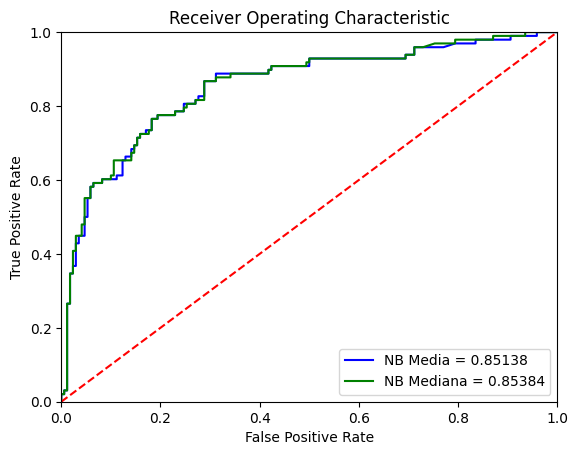

In [ ]:
### Dibujar la curva ROC
from sklearn.metrics import roc_curve, auc


fpr_1, tpr_1, threshold_1 = roc_curve(y_test, probas_uno[:,1])
roc_auc_1 = auc(fpr_1, tpr_1)


fpr_2, tpr_2, threshold_2 = roc_curve(y_test, probas_dos[:,1])
roc_auc_2 = auc(fpr_2, tpr_2)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_1, tpr_1, 'b', label = 'NB Media = %0.5f' % roc_auc_1)
plt.plot(fpr_2, tpr_2, 'g', label = 'NB Mediana = %0.5f' % roc_auc_2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [ ]:
from sklearn.metrics import confusion_matrix

costos = np.array([[1000,-1000],[-500,100]])
print(np.sum(confusion_matrix(y_test,preds_uno) *costos))
print(np.sum(confusion_matrix(y_test,preds_ocho) *costos))

109000
117000


In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_validate

cv_results = cross_validate(modelo_nb, x_train_final[['pclass','age_media','fare','female','male']], y_train, cv=100, scoring = 'roc_auc', return_train_score = True)


<Axes: >

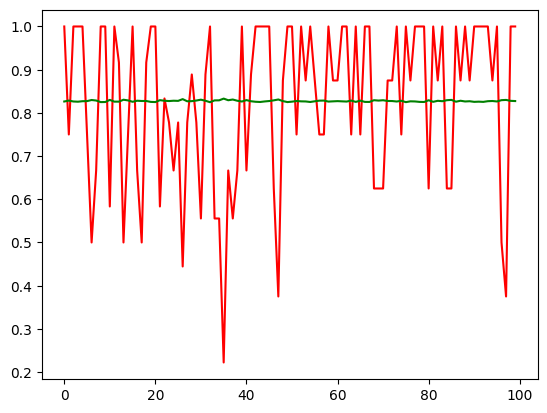

In [ ]:
sns.lineplot(x = np.arange(0,100),y = cv_results['test_score'], color = 'red')
sns.lineplot(x = np.arange(0,100),y = cv_results['train_score'], color = 'green')

In [ ]:
print(np.mean(cv_results['test_score']))
print(np.mean(cv_results['train_score']))
print(np.std(cv_results['test_score']))
print(np.std(cv_results['train_score']))

0.82875
0.8274342972507001
0.18912418963458447
0.0017024254749531881


In [ ]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(modelo_nb, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test_final[['pclass','age_knn','fare','female']], y_test)
result

0.7947761194029851